In [1]:
#%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FormatStrFormatter
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import texttable
import gc
import timeit
import sys
import os

## Prepare plotting data

In [3]:
def plot_parameters_seen_deer(municipalities, number_of_years, pop_type, ax):
    # Read files
    save_dir = "synthetic_data/"
    for location in municipalities:
        if location == "Averoy":
            q = 0
            top_hits_seen_deer_stoch = pd.read_pickle(
                save_dir + "top_hits_Averoy_seen_deer_stoch_par.pkl"
            )
            top_hits_seen_deer_stoch_rep1 = pd.read_pickle(
                save_dir + "top_hits_Averoy_seen_deer_stoch_par_fixed_sph_1.pkl"
            )
            top_hits_seen_deer_stoch_rep50 = pd.read_pickle(
                save_dir + "top_hits_Averoy_seen_deer_stoch_par_fixed_sph_50.pkl"
            )
            top_hits_seen_deer_det_M = pd.read_pickle(
                save_dir + "top_hits_Averoy_seen_deer_det_par_M.pkl"
            )

        if location == "Tingvoll":
            q = 1
            top_hits_seen_deer_stoch = pd.read_pickle(
                save_dir + "top_hits_Tingvoll_seen_deer_stoch_par.pkl"
            )
            top_hits_seen_deer_stoch_rep1 = pd.read_pickle(
                save_dir + "top_hits_Tingvoll_seen_deer_stoch_par_fixed_sph_1.pkl"
            )
            top_hits_seen_deer_stoch_rep50 = pd.read_pickle(
                save_dir + "top_hits_Tingvoll_seen_deer_stoch_par_fixed_sph_50.pkl"
            )
            top_hits_seen_deer_det_M = pd.read_pickle(
                save_dir + "top_hits_Tingvoll_seen_deer_det_par_M.pkl"
            )
            
        if location == "Surnadal":
            q = 2
            top_hits_seen_deer_stoch = pd.read_pickle(
                save_dir + "top_hits_Surnadal_seen_deer_stoch_par.pkl"
            )
            top_hits_seen_deer_stoch_rep1 = pd.read_pickle(
                save_dir + "top_hits_Surnadal_seen_deer_stoch_par_fixed_sph_1.pkl"
            )
            top_hits_seen_deer_stoch_rep50 = pd.read_pickle(
                save_dir + "top_hits_Surnadal_seen_deer_stoch_par_fixed_sph_50.pkl"
            )
            top_hits_seen_deer_det_M = pd.read_pickle(
                save_dir + "top_hits_Surnadal_seen_deer_det_par_M.pkl"
            )
            
        if location == "Sunndal":
            q = 3
            top_hits_seen_deer_stoch = pd.read_pickle(
                save_dir + "top_hits_Sunndal_seen_deer_stoch_par.pkl"
            )
            top_hits_seen_deer_stoch_rep1 = pd.read_pickle(
                save_dir + "top_hits_Sunndal_seen_deer_stoch_par_fixed_sph_1.pkl"
            )
            top_hits_seen_deer_stoch_rep50 = pd.read_pickle(
                save_dir + "top_hits_Sunndal_seen_deer_stoch_par_fixed_sph_50.pkl"
            )
            top_hits_seen_deer_det_M = pd.read_pickle(
                save_dir + "top_hits_Sunndal_seen_deer_det_par_M.pkl"
            )

        if location == "Vestnes":
            q = 4
            top_hits_seen_deer_stoch = pd.read_pickle(
                save_dir + "top_hits_Vestnes_seen_deer_stoch_par.pkl"
            )
            top_hits_seen_deer_stoch_rep1 = pd.read_pickle(
                save_dir + "top_hits_Vestnes_seen_deer_stoch_par_fixed_sph_1.pkl"
            )
            top_hits_seen_deer_stoch_rep50 = pd.read_pickle(
                save_dir + "top_hits_Vestnes_seen_deer_stoch_par_fixed_sph_50.pkl"
            )
            top_hits_seen_deer_det_M = pd.read_pickle(
                save_dir + "top_hits_Vestnes_seen_deer_det_par_M.pkl"
            )

        if location == "Laerdal":
            q = 5
            top_hits_seen_deer_stoch = pd.read_pickle(
                save_dir + "top_hits_Laerdal_seen_deer_stoch_par.pkl"
            )
            top_hits_seen_deer_stoch_rep1 = pd.read_pickle(
                save_dir + "top_hits_Laerdal_seen_deer_stoch_par_fixed_sph_1.pkl"
            )
            top_hits_seen_deer_stoch_rep50 = pd.read_pickle(
                save_dir + "top_hits_Laerdal_seen_deer_stoch_par_fixed_sph_50.pkl"
            )
            top_hits_seen_deer_det_M = pd.read_pickle(
                save_dir + "top_hits_Laerdal_seen_deer_det_par_M.pkl"
            )

        # Get the targeted arrays
        if pop_type == "init_pop":
            top_20_init_orig_ = top_hits_seen_deer_stoch[0 : 20 * number_of_years][
                "init_pop"
            ].values
            top_20_init_orig = top_20_init_orig_[number_of_years - 1 :: number_of_years]

            top_20_init_fixed_1_ = top_hits_seen_deer_stoch_rep1[
                0 : 20 * number_of_years
            ]["init_pop"].values
            top_20_init_fixed_1 = top_20_init_fixed_1_[
                number_of_years - 1 :: number_of_years
            ]

            top_20_init_fixed_50_ = top_hits_seen_deer_stoch_rep50[
                0 : 20 * number_of_years
            ]["init_pop"].values
            top_20_init_fixed_50 = top_20_init_fixed_50_[
                number_of_years - 1 :: number_of_years
            ]

            top_100_init_fixed_50_ = top_hits_seen_deer_stoch_rep50[
                0 : 100 * number_of_years
            ]["init_pop"].values
            top_100_init_fixed_50 = top_100_init_fixed_50_[
                number_of_years - 1 :: number_of_years
            ]

            top_20_init_det_M = top_hits_seen_deer_det_M[0:20]["init_pop"].values
            top_100_init_det_M = top_hits_seen_deer_det_M[0:100]["init_pop"].values
            top_1000_init_det_M = top_hits_seen_deer_det_M[0:1000]["init_pop"].values

            data_collected = [
                top_20_init_orig,
                top_20_init_fixed_1,
                top_20_init_fixed_50,
                top_100_init_fixed_50,
                top_20_init_det_M,
                top_100_init_det_M,
                top_1000_init_det_M,
            ]

        if pop_type == "end_pop":
            top_20_end_orig_ = top_hits_seen_deer_stoch[0 : 20 * number_of_years][
                "tot_pop_ah"
            ].values
            top_20_end_orig = top_20_end_orig_[number_of_years - 1 :: number_of_years]

            top_20_end_fixed_1_ = top_hits_seen_deer_stoch_rep1[
                0 : 20 * number_of_years
            ]["tot_pop_ah"].values
            top_20_end_fixed_1 = top_20_end_fixed_1_[
                number_of_years - 1 :: number_of_years
            ]

            top_20_end_fixed_50_ = top_hits_seen_deer_stoch_rep50[
                0 : 20 * number_of_years
            ]["tot_pop_ah"].values
            top_20_end_fixed_50 = top_20_end_fixed_50_[
                number_of_years - 1 :: number_of_years
            ]

            top_100_end_fixed_50_ = top_hits_seen_deer_stoch_rep50[
                0 : 100 * number_of_years
            ]["tot_pop_ah"].values
            top_100_end_fixed_50 = top_100_end_fixed_50_[
                number_of_years - 1 :: number_of_years
            ]

            top_20_end_det_M = top_hits_seen_deer_det_M[0:20]["tot_pop_ah"].values
            top_100_end_det_M = top_hits_seen_deer_det_M[0:100]["tot_pop_ah"].values
            top_1000_end_det_M = top_hits_seen_deer_det_M[0:1000][
                "tot_pop_ah"
            ].values
            
            data_collected = [
                top_20_end_orig,
                top_20_end_fixed_1,
                top_20_end_fixed_50,
                top_100_end_fixed_50,
                top_20_end_det_M,
                top_100_end_det_M,
                top_1000_end_det_M,
            ]

        from matplotlib.ticker import FormatStrFormatter

        if q == 5:
            if pop_type == "init_pop":
                labels = [
                    "s_init_p_2006_20_orig",
                    "s_init_p_2006_20_fixed_1",
                    "s_init_p_2006_20_fixed_50",
                    "s_init_p_2006_100_fixed_50",
                    "d_init_p_2006_M_20",
                    "d_init_p_2006_M_100",
                    "d_init_p_2006_M_1000",
                ]
            if pop_type == "end_pop":
                labels = [
                    "s_end_p_2023_20_orig",
                    "s_end_p_2023_20_fixed_1",
                    "s_end_p_2023_20_fixed_50",
                    "s_end_p_2023_100_fixed_50",
                    "d_end_p_2023_M_20",
                    "d_end_p_2023_M_100",
                    "d_end_p_2023_M_1000",
                ]

        if q == 5:
            ax[q].set_xticklabels(labels, rotation="vertical", fontsize=8)
        else:
            labels = ["", "", "", "", "", "", ""]
            ax[q].set_xticklabels(labels)     
        
        ymin = 1000
        ymax = 3000
        ax[q].set_ylim([ymin, ymax])
        ax[q].set_yticks(np.arange(1000, 3000.1, 1000))
        
        if (pop_type == "init_pop") & (q == 0):
            ymin = 0
            ymax = 2000
            ax[q].set_ylim([ymin, ymax])
            ax[q].set_yticks(np.arange(0, 2000.1, 1000))

        if (pop_type == "end_pop") & (q == 0):
            ymin = 0
            ymax = 2000
            ax[q].set_ylim([ymin, ymax])
            ax[q].set_yticks(np.arange(0, 2000.1, 1000))

       

        # ax[q].yaxis.set_major_locator(ticker.AutoLocator())
        # ax[q].yaxis.set_minor_locator(ticker.AutoMinorLocator())

        if pop_type == "init_pop":
            ax[q].set_ylabel(municipalities[q], fontsize=16, **afont)

        width = np.ones(7) * 0.7
        box = ax[q].boxplot(
            data_collected,
            positions=[1, 2, 3, 4, 6, 7, 8],
            widths=width,
            showfliers=False,
            labels=labels,
            patch_artist=True,
        )

        colors = [
            "steelblue",
            "steelblue",
            "steelblue",
            "steelblue",
            "firebrick",
            "firebrick",
            "firebrick",
        ]

        for patch, color in zip(box["boxes"], colors):
            patch.set_facecolor(color)

        ax[q].margins(x=0.0)

    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

## Plotting and saving figure

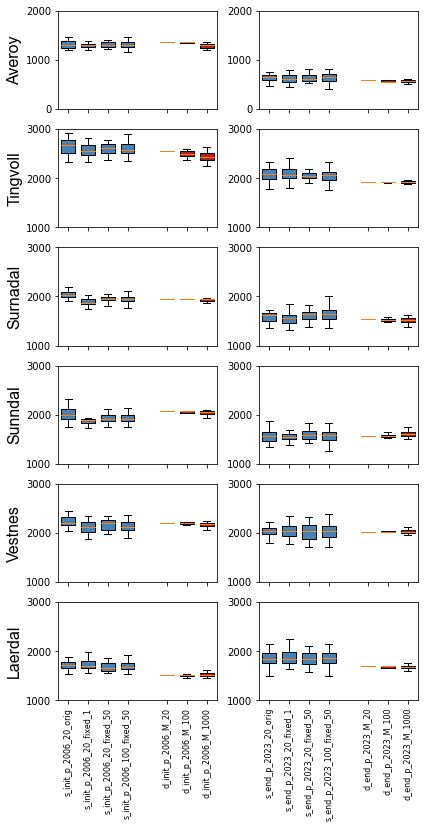

In [4]:
import warnings
warnings.filterwarnings("ignore")

number_of_years = 17
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
afont = {"fontname": "Arial"}

fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(6, 12)) #12,16
ax1 = [axs[0, 0], axs[1, 0], axs[2, 0], axs[3, 0], axs[4, 0], axs[5, 0]]
ax2 = [axs[0, 1], axs[1, 1], axs[2, 1], axs[3, 1], axs[4, 1], axs[5, 1]]

plot_parameters_seen_deer(municipalities,number_of_years,"init_pop", ax1)
plot_parameters_seen_deer(municipalities,number_of_years,"end_pop", ax2)

save_dir = "figures/"
plt.savefig(save_dir + "Figure_S5.pdf", dpi=600, bbox_inches="tight")
pass;